In [5]:
import pandas as pd
import numpy as np
from feature_selector import FeatureSelector
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectPercentile, mutual_info_regression
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
import time
%matplotlib inline

In [2]:
# One building with one year data is extracted for demo
features = pd.read_csv('/Users/t.wang/Desktop/Dissertation/Python/WT-result/'+ 'Filter_One_year_features' + '.csv')
targets = pd.read_csv('/Users/t.wang/Desktop/Dissertation/Python/WT-result/'+ 'Filter_One_year_target' + '.csv')

In [3]:
features.head()

,seasonal_num,TemperatureC,Humidity,Dew PointC,Sea Level PressurehPa,Wind Direction = SE,Wind Direction = WNW,Wind Direction = NW,Wind Direction = West,Wind Direction = South,...,PERCENTILE(Dew PointC - Humidity),PERCENTILE(seasonal_num - WindDirDegrees),PERCENTILE(Dew PointC - Sea Level PressurehPa),PERCENTILE(seasonal_num - TemperatureC),PERCENTILE(Humidity - Sea Level PressurehPa),PERCENTILE(Dew PointC - WindDirDegrees),PERCENTILE(Humidity - TemperatureC),PERCENTILE(Humidity - seasonal_num),PERCENTILE(Humidity - WindDirDegrees),PERCENTILE(Sea Level PressurehPa - TemperatureC)
0,1,3.9,100.0,3.9,1007.3,0,0,0,0,0,...,0.026712,0.082820,0.716381,0.615183,0.992865,0.111358,0.983847,0.997260,0.232477,0.461701
1,1,4.4,93.0,3.3,1006.9,0,0,0,0,0,...,0.102568,0.057477,0.709817,0.602911,0.964269,0.077169,0.919121,0.951998,0.158619,0.439897
2,1,3.9,100.0,3.9,1006.4,0,0,1,0,0,...,0.026712,0.113299,0.739783,0.615183,0.994406,0.147945,0.983847,0.997260,0.269521,0.439897
3,1,3.3,97.0,2.8,1006.5,0,0,1,0,0,...,0.043208,0.113299,0.707192,0.628139,0.987900,0.142694,0.968037,0.988128,0.259532,0.457877
4,1,3.3,97.0,2.8,1006.5,0,0,1,0,0,...,0.043208,0.113299,0.707192,0.628139,0.987900,0.142694,0.968037,0.988128,0.259532,0.457877


In [4]:
targets.head()

,0
0,63.50
1,60.75
2,64.75
3,65.25
4,62.50


# RandomForrest feature importance selection

In [7]:
clf = RandomForestRegressor(n_estimators=1000, random_state=42, n_jobs=-1)

In [10]:
%store -r X_collinear_Variance_MI #read the features and labels data after filter method
%store -r y

no stored variable #read the features and labels data after filter method


In [12]:
X_collinear_Variance_MI.head()

,TemperatureC,IS_WEEKEND(timestamp),Sea Level PressurehPa / TemperatureC,seasonal_num / TemperatureC,TemperatureC / seasonal_num,Dew PointC * seasonal_num,seasonal_num * TemperatureC,ABSOLUTE(TemperatureC),Humidity * TemperatureC / seasonal_num,Sea Level PressurehPa * seasonal_num / Dew PointC,...,Sea Level PressurehPa / Humidity - seasonal_num * TemperatureC,Sea Level PressurehPa * seasonal_num - TemperatureC / seasonal_num,seasonal_num - TemperatureC / Humidity,ABSOLUTE(Dew PointC) - ABSOLUTE(TemperatureC),TemperatureC * WindDirDegrees - TemperatureC / seasonal_num,Dew PointC / Humidity - seasonal_num,Dew PointC * Humidity - Humidity * TemperatureC,Sea Level PressurehPa * seasonal_num - WindDirDegrees / TemperatureC,Sea Level PressurehPa / seasonal_num - TemperatureC / seasonal_num,ABSOLUTE(Dew PointC) - TemperatureC
0,3.9,False,258.282051,0.256410,3.9,3.9,3.9,3.9,390.0,258.282051,...,6.173000,1003.4,0.961000,0.0,1283.1,-0.961000,0.0,922.684615,1003.4,0.0
1,4.4,False,228.840909,0.227273,4.4,3.3,4.4,4.4,409.2,305.121212,...,6.426882,1002.5,0.952688,-1.1,1491.6,-0.964516,-102.3,929.627273,1002.5,-1.1
2,3.9,False,258.051282,0.256410,3.9,3.9,3.9,3.9,390.0,258.051282,...,6.164000,1002.5,0.961000,0.0,1244.1,-0.961000,0.0,924.348718,1002.5,0.0
3,3.3,False,305.000000,0.303030,3.3,2.8,3.3,3.3,320.1,359.464286,...,7.076289,1003.2,0.965979,-0.5,1052.7,-0.971134,-48.5,909.530303,1003.2,-0.5
4,3.3,False,305.000000,0.303030,3.3,2.8,3.3,3.3,320.1,359.464286,...,7.076289,1003.2,0.965979,-0.5,1052.7,-0.971134,-48.5,909.530303,1003.2,-0.5


In [13]:
y.head()

,0
0,63.50
1,60.75
2,64.75
3,65.25
4,62.50


In [14]:
start = time.time()

# Train the regressor exhaustively with all features
clf.fit(X_collinear_Variance_MI, y)

end = time.time()
elapsed = end - start 
print('Time for training all features:'+ time.strftime("%H:%M:%S", time.gmtime(elapsed)))

Time for training all features:00:00:58


In [16]:
# Print the name and importance of each feature
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = X_collinear_Variance_MI.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [29]:
feature_importances.head(10)

,importance
IS_WEEKEND(timestamp),0.198107
Sea Level PressurehPa / Humidity * TemperatureC / Humidity,0.122056
Humidity / TemperatureC * Sea Level PressurehPa / TemperatureC,0.039434
Sea Level PressurehPa * seasonal_num - WindDirDegrees / TemperatureC,0.039187
TemperatureC * WindDirDegrees - TemperatureC / seasonal_num,0.037023
Dew PointC * Humidity - Humidity * TemperatureC,0.029593
Sea Level PressurehPa * seasonal_num - TemperatureC / seasonal_num,0.024930
Sea Level PressurehPa / seasonal_num - TemperatureC / seasonal_num,0.024619
Sea Level PressurehPa / TemperatureC - WindDirDegrees / Dew PointC,0.022246
Sea Level PressurehPa - seasonal_num * TemperatureC,0.020797


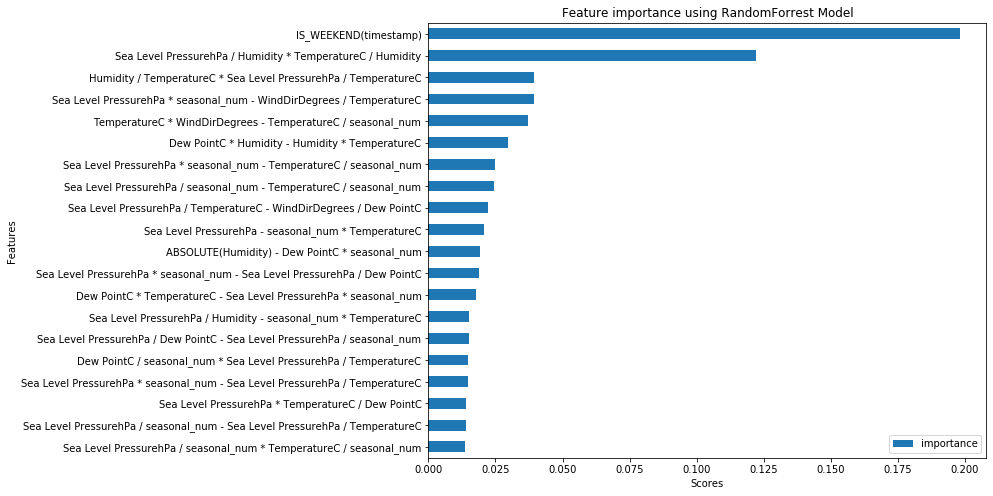

In [35]:
# plot 20 features with the largets scores
fig = feature_importances.nlargest(20, columns='importance').sort_values('importance', ascending=True).plot.barh(
    figsize=(10,8), use_index=True)
fig.set_ylabel("Features")
fig.set_xlabel("Scores")
plt.title("Feature importance using RandomForrest Model")
plt.show()

# Cumulative importances VS number of features

In [82]:
# Summing all feature importance
tot = sum(feature_importances['importance'].values)
tot

1.0000000000000002

In [85]:
# Importances on first five features
feature_importances_100 = [(i/tot)*100 for i in sorted(feature_importances['importance'].values, reverse=True)] 
print(feature_importances_100[0:5])

[19.81070675517813, 12.20561527328483, 3.9434294526152907, 3.9187308838188613, 3.702344843696453]


In [100]:
# Cumulative feature importance
feature_importances_cum = np.cumsum(feature_importances_100)
feature_importances_cum

array([ 19.81070676,  32.01632203,  35.95975148,  39.87848236,
        43.58082721,  46.54010125,  49.03311254,  51.4950166 ,
        53.71956709,  55.79921859,  57.70814449,  59.58207836,
        61.34596766,  62.85910791,  64.36944713,  65.85378993,
        67.31521106,  68.72587164,  70.13125845,  71.50359477,
        72.77524362,  73.93843259,  75.07809652,  76.18187912,
        77.26231375,  78.3379323 ,  79.40278559,  80.31687271,
        81.22313399,  82.03526329,  82.81583874,  83.59499717,
        84.36426877,  85.0799194 ,  85.76403529,  86.44268398,
        87.12063086,  87.78587617,  88.44829746,  89.07246053,
        89.67750816,  90.27893105,  90.87767165,  91.4573469 ,
        92.00647972,  92.47823895,  92.94793672,  93.40183666,
        93.85097135,  94.29226673,  94.73016946,  95.16765607,
        95.59689207,  96.0210382 ,  96.43957589,  96.8559748 ,
        97.23955164,  97.60394314,  97.96528082,  98.31383862,
        98.6557395 ,  98.93587813,  99.19252199,  99.35

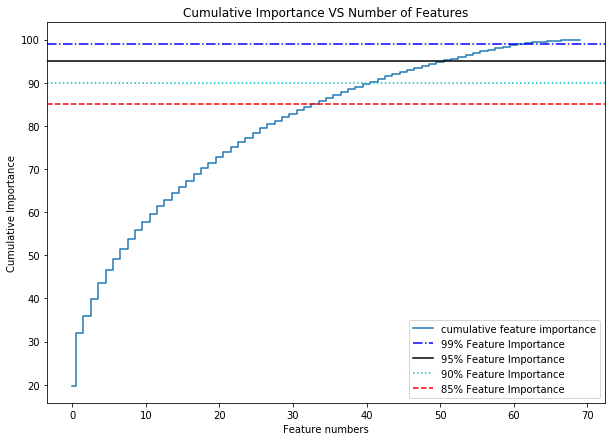

In [96]:
x_values = list(range(len(feature_importances)))

# PLOT OUT THE FEATURE IMPORTANCE SUPERIMPOSED 
plt.figure(figsize=(10, 7))
plt.step(x_values, feature_importances_cum, where='mid',label='cumulative feature importance')
plt.title('Cumulative Importance VS Number of Features')
plt.ylabel('Cumulative Importance')
plt.xlabel('Feature numbers')
plt.axhline(y = 99, color='b', linestyle='-.', label = '99% Feature Importance')
plt.axhline(y = 95, color='k', linestyle='-', label = '95% Feature Importance')
plt.axhline(y = 90, color='c', linestyle=':', label = '90% Feature Importance')
plt.axhline(y = 85, color='r', linestyle='--', label = '85% Feature Importance')
plt.legend(loc='best')
plt.show()

In [97]:
FeatureIndex = [len(feature_importances), np.argmax(feature_importances_cum > 99) + 1, 
                      np.argmax(feature_importances_cum > 95) + 1, np.argmax(feature_importances_cum > 90) + 1, 
                      np.argmax(feature_importances_cum >= 85) + 1]

In [98]:
FeatureIndex

[70, 63, 52, 42, 34]

In [99]:
print(str(FeatureIndex[0]) + ' features are required to maitain 100% importance\n' +
      str(FeatureIndex[1]) + ' features are required to maitain 99% importance\n' +
      str(FeatureIndex[2]) + ' features are required to maitain 95% importance\n' +
      str(FeatureIndex[3]) + ' features are required to maitain 90% importance\n' +
      str(FeatureIndex[4]) + ' features are required to maitain 85% importance\n')

70 features are required to maitain 100% importance
63 features are required to maitain 99% importance
52 features are required to maitain 95% importance
42 features are required to maitain 90% importance
34 features are required to maitain 85% importance



In [102]:
feature_importances.iloc[:3,:]

,importance
IS_WEEKEND(timestamp),0.198107
Sea Level PressurehPa / Humidity * TemperatureC / Humidity,0.122056
Humidity / TemperatureC * Sea Level PressurehPa / TemperatureC,0.039434


In [105]:
# number of features to be chosen
picked_features_RF = feature_importances.iloc[:3,:].index
picked_features_RF

Index(['IS_WEEKEND(timestamp)',
       'Sea Level PressurehPa / Humidity * TemperatureC / Humidity',
       'Humidity / TemperatureC * Sea Level PressurehPa / TemperatureC'],
      dtype='object')

In [107]:
X_collinear_Variance_MI[picked_features_RF].head()

,IS_WEEKEND(timestamp),Sea Level PressurehPa / Humidity * TemperatureC / Humidity,Humidity / TemperatureC * Sea Level PressurehPa / TemperatureC
0,False,0.392847,6622.616700
1,False,0.512240,4836.864669
2,False,0.392496,6616.699540
3,False,0.353008,8965.151515
4,False,0.353008,8965.151515


In [116]:
# function to transform features based on retained importance
def Importance_based_fea(X, Retained_importance):
    pick_num = np.argmax(feature_importances_cum > Retained_importance) + 1
    fea_name = feature_importances.iloc[:pick_num,:].index
    return X[fea_name], pick_num

In [127]:
X_collinear_Variance_MI_RF, num = Importance_based_fea(X_collinear_Variance_MI, 95)
X_collinear_Variance_MI_RF.head()

,IS_WEEKEND(timestamp),Sea Level PressurehPa / Humidity * TemperatureC / Humidity,Humidity / TemperatureC * Sea Level PressurehPa / TemperatureC,Sea Level PressurehPa * seasonal_num - WindDirDegrees / TemperatureC,TemperatureC * WindDirDegrees - TemperatureC / seasonal_num,Dew PointC * Humidity - Humidity * TemperatureC,Sea Level PressurehPa * seasonal_num - TemperatureC / seasonal_num,Sea Level PressurehPa / seasonal_num - TemperatureC / seasonal_num,Sea Level PressurehPa / TemperatureC - WindDirDegrees / Dew PointC,Sea Level PressurehPa - seasonal_num * TemperatureC,...,Humidity / seasonal_num * Sea Level PressurehPa / TemperatureC,Humidity / seasonal_num * Sea Level PressurehPa / Dew PointC,Sea Level PressurehPa / seasonal_num * Sea Level PressurehPa / TemperatureC,Dew PointC / WindDirDegrees - Sea Level PressurehPa / TemperatureC,Sea Level PressurehPa / TemperatureC,Sea Level PressurehPa / TemperatureC - TemperatureC / WindDirDegrees,Sea Level PressurehPa / WindDirDegrees * WindDirDegrees / TemperatureC,Dew PointC * seasonal_num,ABSOLUTE(Dew PointC) - seasonal_num * TemperatureC,Humidity / Dew PointC * Humidity / seasonal_num
0,False,0.392847,6622.616700,922.684615,1283.1,0.0,1003.4,1003.4,173.666667,1003.4,...,25828.205128,25828.205128,260167.510256,-258.270233,258.282051,258.270233,258.282051,3.9,0.0,2564.102564
1,False,0.512240,4836.864669,929.627273,1491.6,-102.3,1002.5,1002.5,125.810606,1002.5,...,21282.204545,28376.272727,230419.911364,-228.831203,228.840909,228.827968,228.840909,3.3,-1.1,2620.909091
2,False,0.392496,6616.699540,924.348718,1244.1,0.0,1002.5,1002.5,176.000000,1002.5,...,25805.128205,25805.128205,259702.810256,-258.039095,258.051282,258.039095,258.051282,3.9,0.0,2564.102564
3,False,0.353008,8965.151515,909.530303,1052.7,-48.5,1003.2,1003.2,190.714286,1003.2,...,29585.000000,34868.035714,306982.500000,-304.991250,305.000000,304.989688,305.000000,2.8,-0.5,3360.357143
4,False,0.353008,8965.151515,909.530303,1052.7,-48.5,1003.2,1003.2,190.714286,1003.2,...,29585.000000,34868.035714,306982.500000,-304.991250,305.000000,304.989688,305.000000,2.8,-0.5,3360.357143


In [128]:
print('number of features retained: '+ str(num))

number of features retained: 52
